In [24]:
import pandas as pd
from math import sqrt
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split

df = pd.read_csv('Levels_Fyi_Salary_Clean_Data.csv')
X = df[['totalyearlycompensation','timestamp']]      # slice dataFrame for input variables
y = df['basesalary']        # slice dataFrame for target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.001, random_state=20)
regr = linear_model.LinearRegression().fit(X_train, y_train)

# Let's create one sample and predict the number of comments
sample = [115000, 2020]        # a sample with 1000 likes and 100 dislikes
sample_pred = regr.predict([sample])
print('----- Sample case -----')
print("totalyearlycompensation:",sample[0])
print("timestamp:",sample[1])
print('Predicted number of comments:', int(sample_pred))
print('-----------------------')

# The coefficients
print('Coefficients:')
print(regr.coef_)
# Use the model to predict y from X_test
y_pred = regr.predict(X_test)
# Root mean squared error
mse = metrics.mean_squared_error(y_test, y_pred)
print('Root mean squared error (RMSE):', sqrt(mse))
# R-squared score: 1 is perfect prediction
print('R-squared score:', metrics.r2_score(y_test, y_pred))

----- Sample case -----
totalyearlycompensation: 115000
timestamp: 2020
Predicted number of comments: 113872
-----------------------
Coefficients:
[3.07117653e-01 9.63077771e+02]
Root mean squared error (RMSE): 16795.054221126615
R-squared score: 0.7104046921853451


C:\Users\jason xiao\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Text(0.5, 1.0, 'Actual vs. predict')

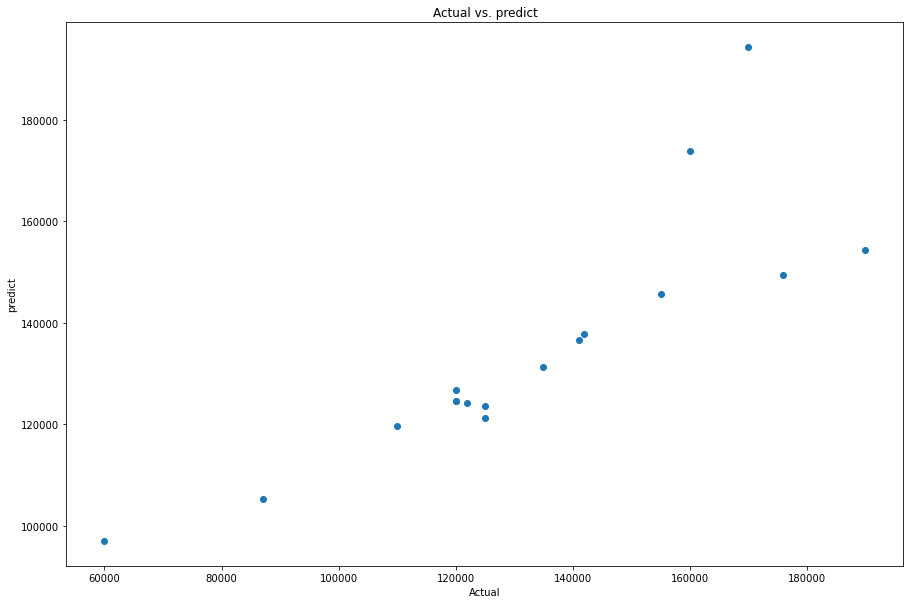

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('predict')
plt.title('Actual vs. predict')